https://stepik.org/lesson/1576173/step/9

Q = 0.95


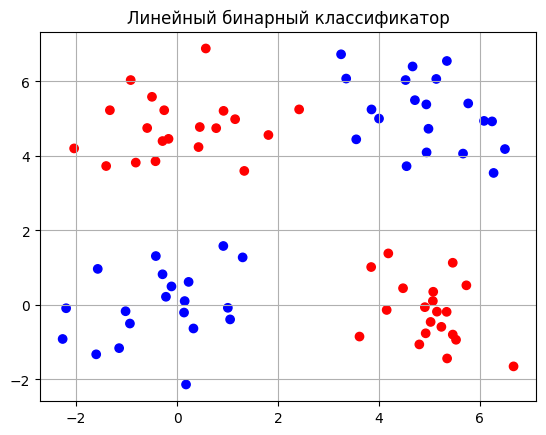

In [ ]:
import numpy as np
import torch
import torch.optim as optim

def model(x, w1, w2, b1, b2):
    x = w1 @ x + b1
    x = torch.tanh(x)
    x = w2 @ x + b2
    return x


np.random.seed(1) # установка "зерна" генератора датчика случайных чисел
torch.manual_seed(123)

W1 = torch.empty(2, 2).normal_(0, 1e-5)
bias1 = torch.rand(2, requires_grad=True)
W2 = torch.empty(1, 2).normal_(0, 1e-5)
bias2 = torch.rand(1, requires_grad=True)

W1.requires_grad_(True)
W2.requires_grad_(True)

# Данные
n_items = 20
C00 = torch.empty(n_items, 2).normal_(0, 1)
C11 = torch.empty(n_items, 2).normal_(0, 1) + torch.FloatTensor([5, 5])
C01 = torch.empty(n_items, 2).normal_(0, 1) + torch.FloatTensor([0, 5])
C10 = torch.empty(n_items, 2).normal_(0, 1) + torch.FloatTensor([5, 0])

x_train = torch.cat([C00, C11, C01, C10])
y_train = torch.cat([torch.ones(n_items * 2), torch.zeros(n_items * 2)])

# Параметры
lr = 0.01               # шаг обучения
N = 1000                # число итераций при обучении
total = y_train.size(0) # размер обучающей выборки

# Функция потерь для бинарной классификации и оптимизатор
loss_func = torch.nn.BCEWithLogitsLoss()
optimizer = optim.Adam(params=[W1, W2, bias1, bias2], lr=lr)

# Градиентный спуск
for _ in range(N):
    k = np.random.randint(0, total) # случайный индекс для выбора образа
    y_pred = model(x_train[k], W1, W2, bias1, bias2)  # предсказание
    loss = loss_func(y_pred[0], y_train[k]) # потери с таким предсказанием
    loss.backward()                 # проход назад с подсчётом производных
    optimizer.step()                # шаг с заданным выше оптимизатором
    optimizer.zero_grad()           # чистим накопленный градиент

pred = torch.tensor([model(x, W1, W2, bias1, bias2) for x in x_train])
Q = (torch.round(torch.sigmoid(pred)) == y_train).sum().item() / len(y_train)
print('Q =', Q)

# График
import matplotlib.pyplot as plt
color = 'rb'
plt.scatter(x_train[:, 0], x_train[:, 1], c=[color[int(y)] for y in y_train])

plt.grid()
plt.title('Линейный бинарный классификатор')
plt.show()